In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a dataframe
df = pd.read_csv("south_downs_way.csv")

# Display the dataframe
df

,Unnamed: 0,latitude,longitude,time,elevation_change,elevation,speed,day,distance,gradient
0,0,51.061216,-1.309166,1.714728e+09,0.000000,38.000000,1.821046,1,0.000000,-0.022800
1,1,51.061194,-1.309031,1.714728e+09,0.000000,38.000000,2.111646,1,9.785721,-0.026704
2,2,51.061212,-1.309028,1.714728e+09,-0.200001,37.799999,2.631965,1,2.026501,-0.030729
3,3,51.061201,-1.308969,1.714728e+09,-0.200001,37.599998,3.265195,1,4.281546,-0.031380
4,4,51.061190,-1.308957,1.714728e+09,0.000000,37.599998,3.852399,1,1.521301,-0.028568
...,...,...,...,...,...,...,...,...,...,...
14146,14146,50.896832,-0.542086,1.714998e+09,0.000000,4.000000,1.071414,4,1.456105,0.012295
14147,14147,50.896832,-0.542083,1.714998e+09,0.000000,4.000000,1.024777,4,0.188932,0.008481
14148,14148,50.896832,-0.542081,1.714998e+09,0.000000,4.000000,0.997165,4,0.165377,0.004550
14149,14149,50.896836,-0.542076,1.714998e+09,0.000000,4.000000,1.013259,4,0.567449,0.001926


[]

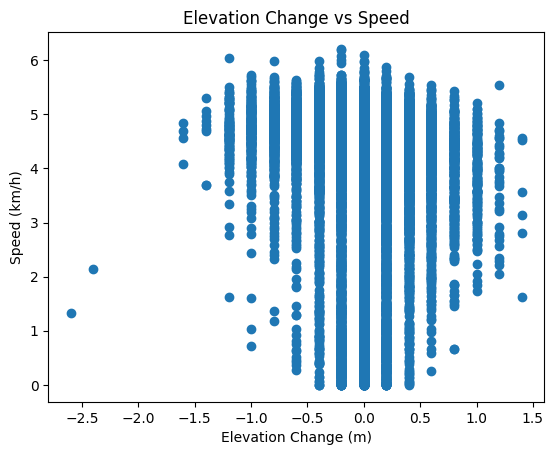

In [35]:
fig, ax = plt.subplots()
ax.scatter(df["elevation_change"], df["speed"])
ax.set_xlabel("Elevation Change (m)")
ax.set_ylabel("Speed (km/h)")

ax.set_title("Elevation Change vs Speed")
plt.plot()

### What does this mean?

I think there is a lot going on in this graph. First of all, we can see elevations are quantised at exactly .2m intervals, but that should not affect the data too much. Next, I notice the 0 speed values. There is a significant block of 0 speed values between -.5 and +.5 elevation. I believe this is because when we slow down, we change less elevation. We can see that the bottom end of the speeds tail off as the elevation increases, because when we walk faster, we gain more elevation. How do I solve this problem? 

I think dimensionality reduction may solve our problem. The problem is there is a correlation between speed and elevation change, not just vise versa. As one walks faster, they traverse more elevation. Dimensionality reduction I believe would remove this, so let's try it. 

Alternatively, a simpler or more naive approach would be to remove all points at less than 1kph, because that is not a full walking pace. 

The third and final solution is to measure correlation using gradient instead of absolute elevation change. A percentage based metric would account for low end values, as if one is travelling slower, their gradient will not be affected. 

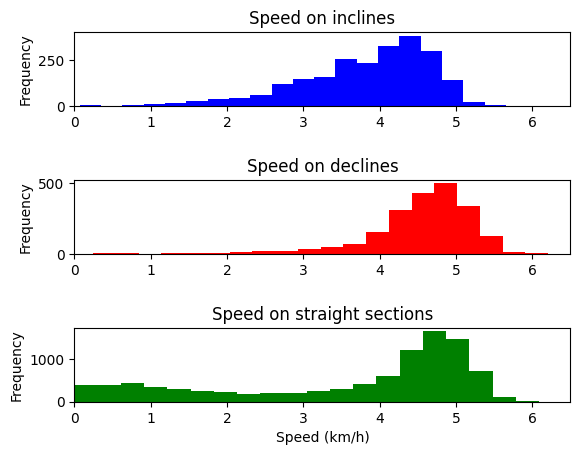

In [63]:
def separate_speeds(df):
  turning_point = .06
  incline_df = df[df["gradient"] > turning_point]
  decline_df = df[df["gradient"] < -turning_point]
  straight_df = df[(df["gradient"] > -turning_point) & (df["gradient"] < turning_point)]
  return incline_df, decline_df, straight_df

def separate_speeds_and_plot(df): 
  incline_df, decline_df, straight_df = separate_speeds(df)

  fig, axs = plt.subplots(3)
  bins = 20

  axs[0].hist(incline_df["speed"], bins=bins, color="b")
  # axs[0].set_xlabel("Speed (km/h)")
  axs[0].set_ylabel("Frequency")
  axs[0].set_title("Speed on inclines")

  axs[1].hist(decline_df["speed"], bins=bins, color="r")
  # axs[1].set_xlabel("Speed (km/h)")
  axs[1].set_ylabel("Frequency")
  axs[1].set_title("Speed on declines")

  axs[2].hist(straight_df["speed"], bins=bins, color="g")
  axs[2].set_xlabel("Speed (km/h)")
  axs[2].set_ylabel("Frequency")
  axs[2].set_title("Speed on straight sections")
  
  for ax in axs:
    ax.set_xlim(0, 6.5)
    ax.set_xticks(range(0,7))
    ax.set_xticklabels(range(0,7))
  

  plt.tick_params(axis='x', labelbottom=True)

  plt.subplots_adjust(hspace=1)
  plt.plot()
separate_speeds_and_plot(df)

## Gradient

I believe that using gradient in my analysis will yield better result

[]

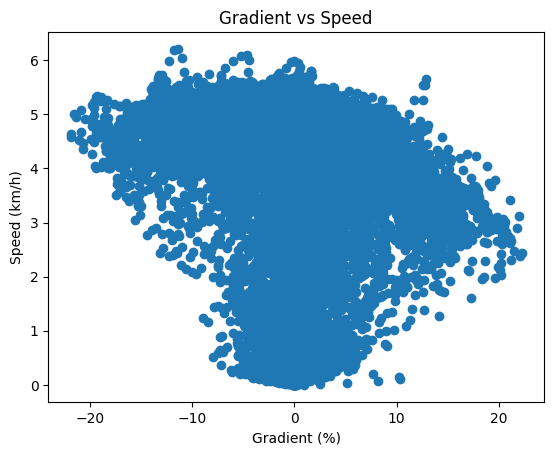

In [38]:
fig, ax = plt.subplots()
ax.scatter((df["gradient"]) * 100, df["speed"])
ax.set_xlabel("Gradient (%)")
ax.set_ylabel("Speed (km/h)")

ax.set_title("Gradient vs Speed")
plt.plot()

In [67]:
incline_df, decline_df, straight_df = separate_speeds(df)
incline_df["speed"].describe()

count    2287.000000
mean        3.810564
std         0.867932
min         0.071849
25%         3.328584
50%         3.998367
75%         4.457148
max         5.654274
Name: speed, dtype: float64

In [66]:
decline_df["speed"].describe()

count    2111.000000
mean        4.544256
std         0.716602
min         0.245106
25%         4.276637
50%         4.677256
75%         4.982319
max         6.206429
Name: speed, dtype: float64

In [68]:
straight_df["speed"].describe()

count    9753.000000
mean        3.583114
std         1.662098
min         0.000000
25%         2.240829
50%         4.356826
75%         4.850753
max         6.089173
Name: speed, dtype: float64

(0       0.071849
 1       0.109248
 2       0.151554
 3       0.203441
 4       0.554142
           ...   
 2282    5.333511
 2283    5.401115
 2284    5.535591
 2285    5.545049
 2286    5.654274
 Name: speed, Length: 2287, dtype: float64,
 0       0.245106
 1       0.283670
 2       0.374312
 3       0.514102
 4       0.596560
           ...   
 2106    5.855165
 2107    5.977228
 2108    6.044712
 2109    6.184717
 2110    6.206429
 Name: speed, Length: 2111, dtype: float64,
 0    0.0
 Name: speed, dtype: float64)